In [1]:

%load_ext autoreload
%autoreload 2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec
from random import sample
from scipy.ndimage import gaussian_filter1d
from matplotlib.collections import LineCollection


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots.plots import plot_oa


import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
c:\Users\nlab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [4]:
def by_start_obstalce_average(self,date):
        savepath = "D:/obstacle_avoidance/recordings"
        savepath_session = os.path.join(*[savepath,'figures'])
        #savepath_session = os.path.join(*[savepath,str(pd.unique(self.df.date).item()),str(pd.unique(self.df.animal).item()),str(pd.unique(self.df.task).item())])
        pdf = PdfPages(os.path.join((savepath_session), str(date)+ 'by_' +'_start_'+'obstacle' + 'consecutive.pdf'))
        key='start'
        fig = plt.figure(constrained_layout=False, figsize=(20, 10),dpi=90)
        fig.suptitle('by ' + key + ' '+ 'and ' +'obstacle ')
        spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)


        """Right"""
        panel_1 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[0])
        ax1 = fig.add_subplot(panel_1[0,0])
        plot_arena(self.df,ax1)
        ax2 = fig.add_subplot(panel_1[0,1])
        plot_arena(self.df,ax2)
        ax2.set_title('right')
        ax3 = fig.add_subplot(panel_1[1,0])
        plot_arena(self.df,ax3)
        ax4 = fig.add_subplot(panel_1[1,1])
        plot_arena(self.df,ax4)
        ax5 = fig.add_subplot(panel_1[2,0])
        plot_arena(self.df,ax5)
        ax6 = fig.add_subplot(panel_1[2,1])
        plot_arena(self.df,ax6)

        right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]


        """Left """
        panel_2 = gridspec.GridSpecFromSubplotSpec(3,2,subplot_spec=spec2[1])
        ax7 = fig.add_subplot(panel_2[0,0])
        plot_arena(self.df,ax7)
        ax8 = fig.add_subplot(panel_2[0,1])
        plot_arena(self.df,ax8)
        ax8.set_title('left')
        ax9 = fig.add_subplot(panel_2[1,0])
        plot_arena(self.df,ax9)
        ax10 = fig.add_subplot(panel_2[1,1])
        plot_arena(self.df,ax10)
        ax11= fig.add_subplot(panel_2[2,0])
        plot_arena(self.df,ax11)
        ax12 = fig.add_subplot(panel_2[2,1])
        plot_arena(self.df,ax12)

        left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]




        """ plot trials"""
        right_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),right_axs))
        left_obstacle_dict = dict(zip(pd.unique(self.df['obstacle_cluster'].sort_values().to_list()),left_axs))

        for direction, direction_frame in self.df.groupby(['odd']):
            for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
                #cluster_frame = cluster_frame.sample(num_sample)
                right_obstacle_axis = right_obstacle_dict.get(cluster)
                left_obstacle_axis = left_obstacle_dict.get(cluster)
                plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
                plot_obstacle(cluster_frame,left_obstacle_axis,cluster)
                right_obstacle_axis.set_title(str(cluster))
                left_obstacle_axis.set_title(str(cluster))

                for start, start_frame in cluster_frame.groupby(['start']):

                    if direction == 'right':
                        if start == 'top':
                            if cluster in [2,3]:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)

                            else:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                        if start == 'bottom':
                            if cluster in [2,3]:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)
                            else:
                                right_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                right_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)


                    if direction == 'left':
                        if start == 'top':
                             if cluster in [2,3]:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                             else:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'black')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='black', alpha=0.5)
                        if start == 'bottom':
                            if cluster in [2,3]:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['median_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['mad_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)

                            else:
                                left_obstacle_axis.plot(np.linspace(10,50,50),start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0],c = 'red')
                                left_obstacle_axis.fill_between(np.linspace(10,50,50), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)+start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), start_frame['mean_interp_ts_nose_y_cm'].to_numpy()[0].astype(float)-start_frame['std_interp_ts_nose_y_cm'].to_numpy()[0].astype(float), facecolor='red', alpha=0.5)

        pdf.savefig(); plt.close()
        pdf.close()

In [14]:
session = plot_oa(r"D:\obstacle_avoidance\metadata\compiled_data\G8CK1_G8CK_oa_061423.json",'blank')
session.gather_session_df('obstacle',6)

6


In [7]:
session.df.columns.to_numpy()

array(['level_0', 'index', 'first_poke', 'second_poke',
       'trial_timestamps', 'trial_vidframes', 'nose_x', 'nose_y',
       'leftear_x', 'leftear_y', 'rightear_x', 'rightear_y', 'spine_x',
       'spine_y', 'midspine_x', 'midspine_y', 'tailbase_x', 'tailbase_y',
       'midtail_x', 'midtail_y', 'tailend_x', 'tailend_y', 'arenaTL_x',
       'arenaTL_y', 'arenaTR_x', 'arenaTR_y', 'arenaBL_x', 'arenaBL_y',
       'arenaBR_x', 'arenaBR_y', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTR_x', 'obstacleTR_y', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBL_x', 'obstacleBL_y', 'leftportT_x', 'leftportT_y',
       'leftportB_x', 'leftportB_y', 'rightportT_x', 'rightportT_y',
       'rightportB_x', 'rightportB_y', 'len', 'animal', 'date', 'task',
       'nose_x_cm', 'nose_y_cm', 'leftear_x_cm', 'leftear_y_cm',
       'rightear_x_cm', 'rightear_y_cm', 'spine_x_cm', 'spine_y_cm',
       'midspine_x_cm', 'midspine_y_cm', 'tailbase_x_cm', 'tailbase_y_cm',
       'midtail_x_cm', 'midtail_y

In [15]:
session.by_start_obstalce_average('061523')

In [17]:
session.df.orginal_index

0         0
1         1
2         2
3         4
4         5
       ... 
1179    152
1180    153
1181    154
1182    155
1183    156
Name: orginal_index, Length: 1184, dtype: int64

In [11]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\061323\G8CKTT\oa\processed_G8CKTT_061323_oa.h5")

In [12]:
test= plot_oa('blank',df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 'resample_angle_to_leftport'

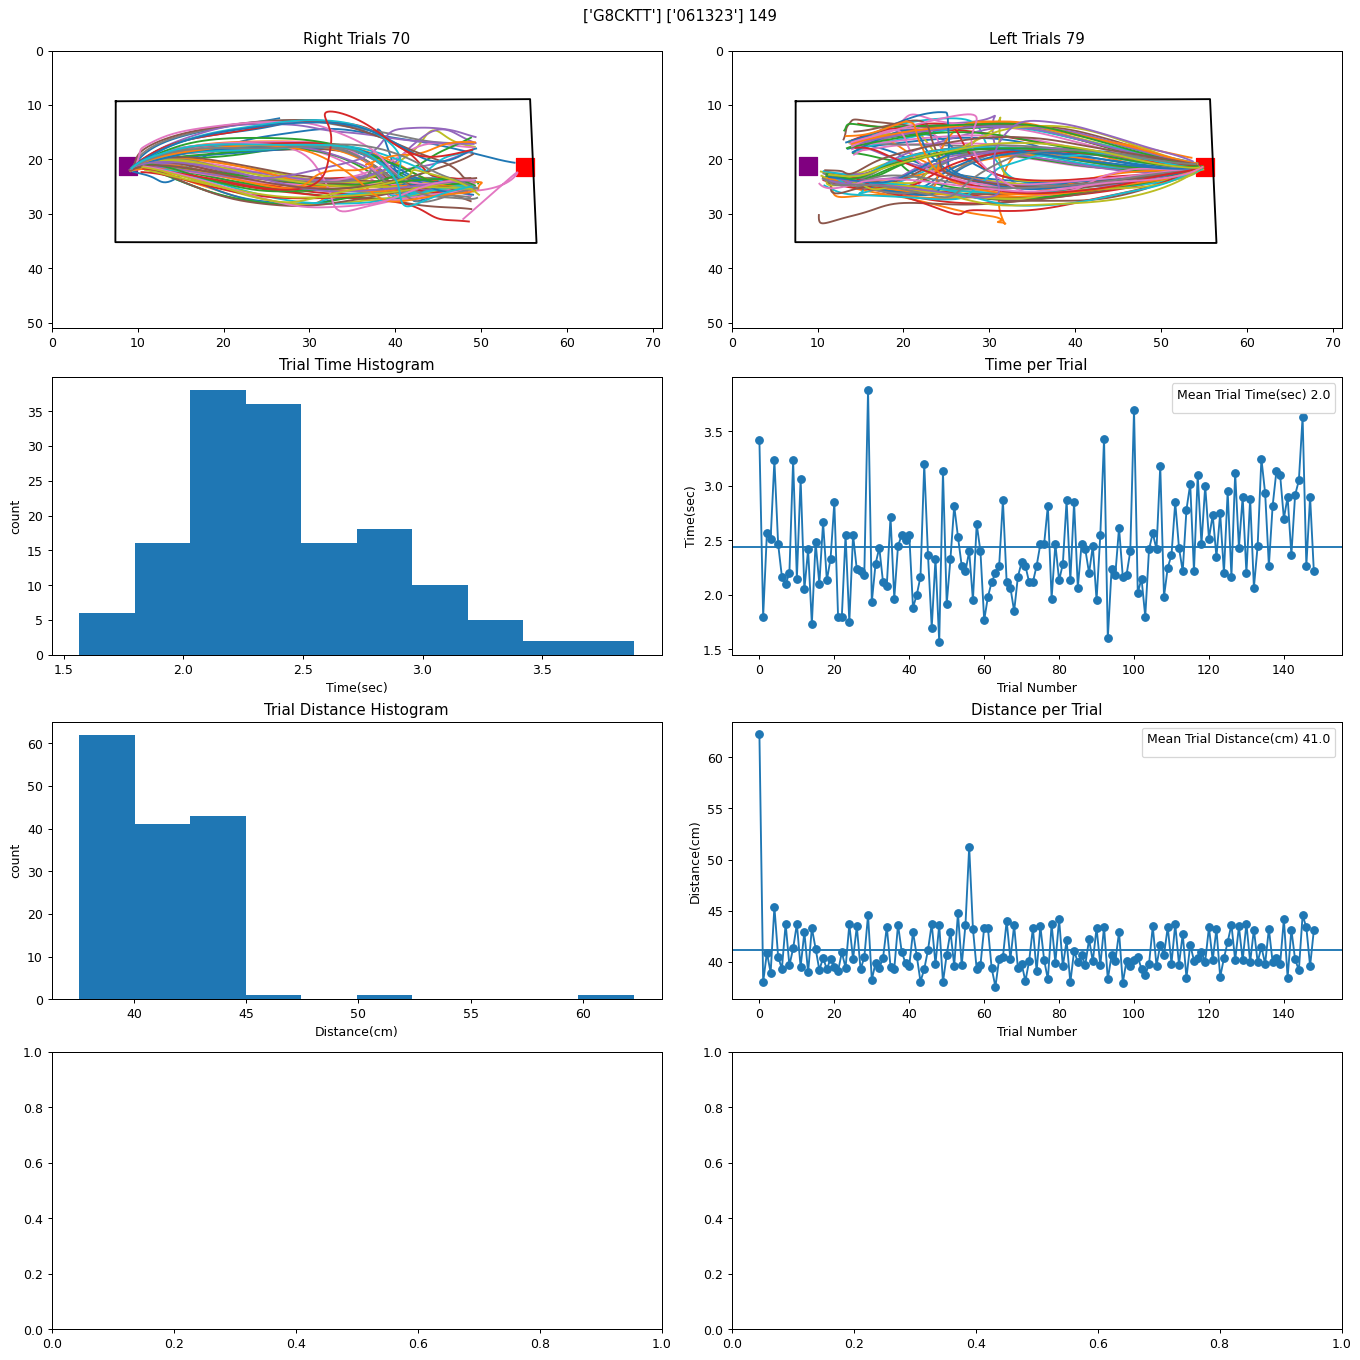

In [13]:
test.train_day_summary()